In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
dir="D:/ds model/rps/rps-cv-images"

In [3]:
img_size=(150,150)
batch_size=32

In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    
)

train_data=train_datagen.flow_from_directory(
    dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data=train_datagen.flow_from_directory(
    dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [5]:
# CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

c:\Users\navee\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


c:\Users\navee\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 58s 926ms/step - accuracy: 0.4913 - loss: 1.0689 - val_accuracy: 0.8673 - val_loss: 0.4575
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 415ms/step - accuracy: 0.8813 - loss: 0.3608 - val_accuracy: 0.9519 - val_loss: 0.1817
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.9595 - loss: 0.1324 - val_accuracy: 0.9565 - val_loss: 0.1358
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - accuracy: 0.9792 - loss: 0.0790 - val_accuracy: 0.9703 - val_loss: 0.1244
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 425ms/step - accuracy: 0.9891 - loss: 0.0487 - val_accuracy: 0.9359 - val_loss: 0.1815
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 418ms/step - accuracy: 0.9885 - loss: 0.0343 - val_accuracy: 0.9794 - val_loss: 0.0987
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 418ms/step - accuracy: 0.9892 - loss: 0.0267 - val_accuracy: 0.9680 - val_loss: 0.1514
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step - accuracy: 0.9983 - loss: 0.0077 - val_accuracy: 0.970

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step


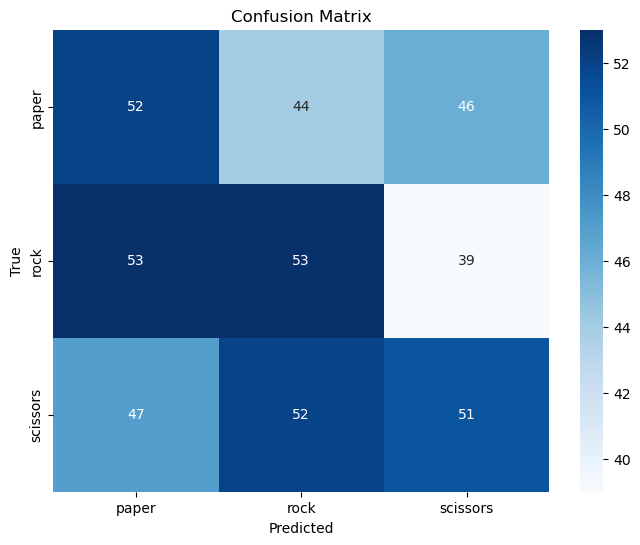

Classification Report:

              precision    recall  f1-score   support

       paper       0.34      0.37      0.35       142
        rock       0.36      0.37      0.36       145
    scissors       0.38      0.34      0.36       150

    accuracy                           0.36       437
   macro avg       0.36      0.36      0.36       437
weighted avg       0.36      0.36      0.36       437



In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions
Y_true = val_data.classes
Y_pred_probs = model.predict(val_data)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Class labels
class_names = list(val_data.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(Y_true, Y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img("D:/ds model/rps/rps-cv-images/scissors/bb.png", target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_names = list(train_data.class_indices.keys())
print("Predicted:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted: scissors
